   Unnamed: 0  i  neutrinoE   trueKE  recoE_lookup  total_PMTs_hits2  \
0           0  0    664.541  236.327      22.35380          0.000000   
1           1  3    400.551  186.765       2.46971          0.000000   
2           2  4    633.353  448.481     409.95400          0.308444   
3           3  7    845.921  586.647      37.83740          0.000000   
4           4  9   1323.140  963.822    1408.07000          0.111333   

   total_hits2  total_ring_PEs2  pot_length2  hits_pot_length2  recoDWallR2  \
0     0.023325          0.00000     0.662787          0.003754     0.003389   
1     0.010075          0.00000     0.662787          0.001621     0.003389   
2     0.080400          0.13070     0.531171          0.016146     0.035389   
3     0.011950          0.00000     0.918554          0.001388     0.042498   
4     0.142300          0.26265     0.093641          0.162093     0.616305   

   recoDWallZ2  lambda_max_2  recoDWall_2  recoToWall_2  vtxTrackBias_2  
0     0.458415    

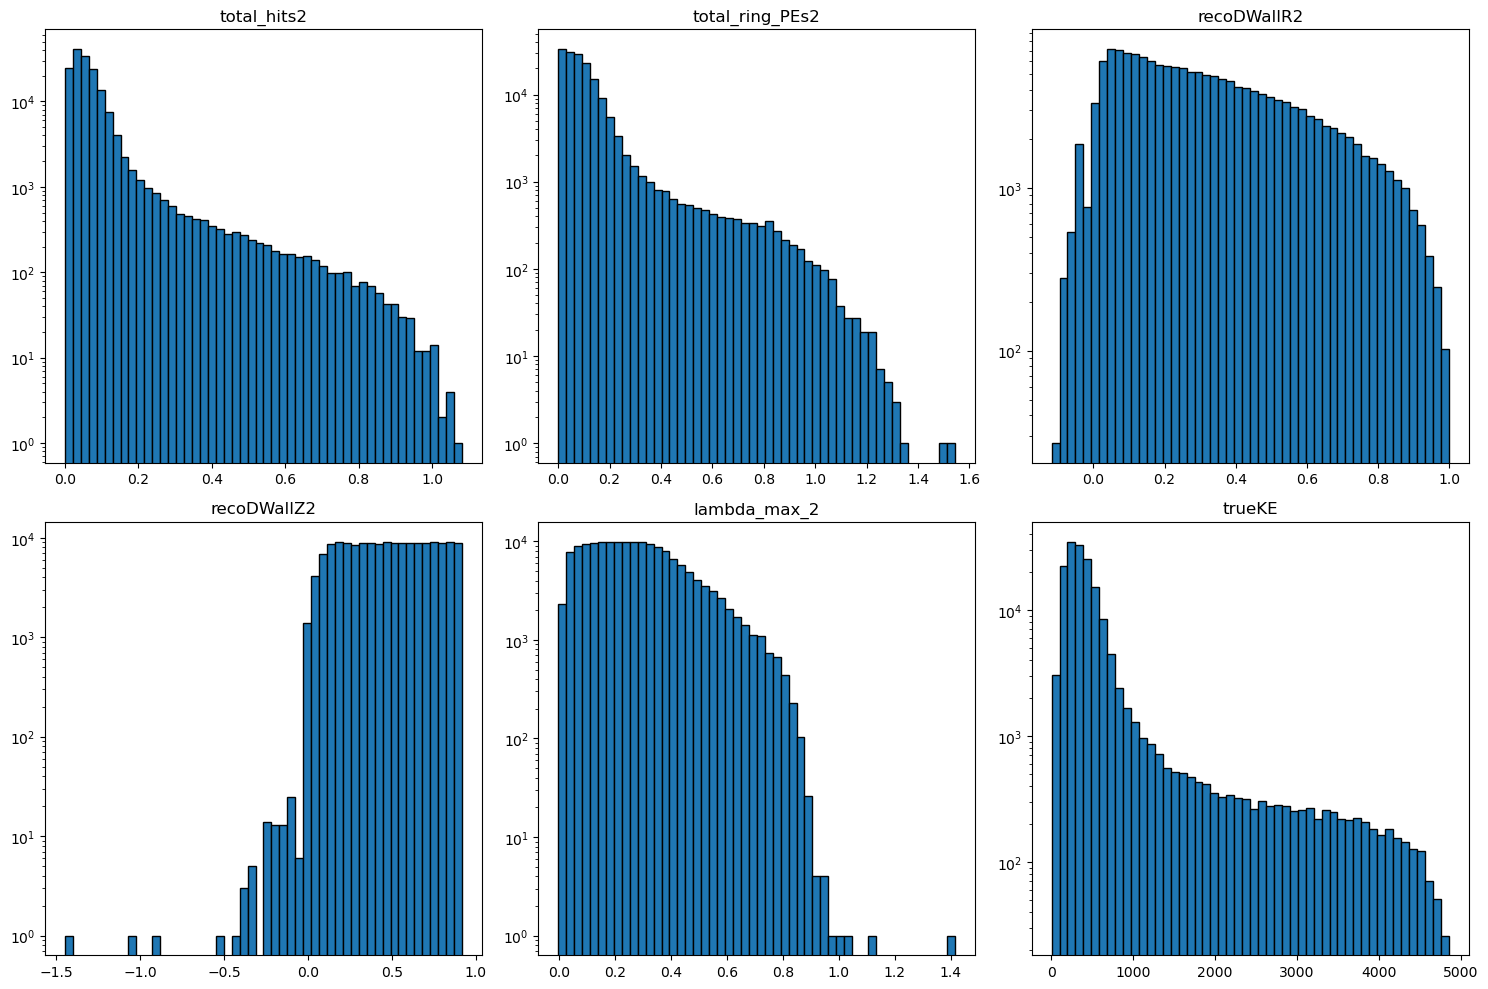

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:/Users/jonat/Downloads/numu_energy_studies.csv'
df = pd.read_csv(file_path)
df.dropna(inplace=True)
print(df.head(5))
print(df.columns)

cols = ['total_hits2', 'total_ring_PEs2', 'recoDWallR2', 'recoDWallZ2', 'lambda_max_2', 'trueKE']
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols):
    plt.subplot(2, 3, i+1)
    plt.hist(df[col], bins=50, edgecolor='black')
    plt.yscale('log')
    plt.title(col)
plt.tight_layout()
plt.show()


In [10]:
import numpy as np
from sklearn import model_selection
np.random.seed(42)
input_data = df[['total_hits2', 'total_ring_PEs2', 'recoDWallR2', 'recoDWallZ2', 'lambda_max_2']]
target = df['trueKE']
train_data, test_data, train_target, test_target = model_selection.train_test_split(input_data, target, test_size=0.3, random_state=42)
print(train_data.shape, train_target.shape, test_data.shape, test_target.shape)

from keras.models import Sequential
from keras.layers import Dense, Input
def my_model(**kwargs):
    model = Sequential()
    model.add(Input(shape=(5,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

from keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks_ = [
    EarlyStopping(verbose=True, patience=10, monitor='loss'),
    ModelCheckpoint('model.h5', monitor='loss', verbose=0, save_best_only=True, mode='max')
]

from keras.wrappers import SKLearnRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
batchSize = 256
N_epochs = 50
estimators = []
estimators.append(('mlp', SKLearnRegressor(my_model, fit_kwargs={'epochs': N_epochs, 'batch_size': batchSize, 'mlp__callbacks': callbacks_, 'verbose': 1})))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
results = cross_val_score(pipeline, input_data, target, cv=kfold, scoring='r2')
print("Result: %.2f ± %.2f" % (results.mean(), results.std()))


(114514, 5) (114514,) (49078, 5) (49078,)
4601/4601 ━━━━━━━━━━━━━━━━━━━━ 5s 804us/step - loss: 338936.0625
512/512 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step
4601/4601 ━━━━━━━━━━━━━━━━━━━━ 4s 751us/step - loss: 369174.4062
512/512 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
4602/4602 ━━━━━━━━━━━━━━━━━━━━ 4s 829us/step - loss: 370879.7812
512/512 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step
4602/4602 ━━━━━━━━━━━━━━━━━━━━ 4s 836us/step - loss: 378968.4375
512/512 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
4602/4602 ━━━━━━━━━━━━━━━━━━━━ 4s 805us/step - loss: 358095.9375
512/512 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step
4602/4602 ━━━━━━━━━━━━━━━━━━━━ 4s 820us/step - loss: 382658.7188
512/512 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
4602/4602 ━━━━━━━━━━━━━━━━━━━━ 4s 831us/step - loss: 323276.6875
512/512 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step
4602/4602 ━━━━━━━━━━━━━━━━━━━━ 4s 814us/step - loss: 351299.5938
512/512 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step
4602/4602 ━━━━━━━━━━━━━━━━━━━━ 4s 789us/step - loss: 339811.4688
512/512 ━━━━━━━━━━━━━━━━━━━━ 

Epoch 1/50
436/448 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - loss: 613951.8750

448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 612099.8125 - val_loss: 363963.8750
Epoch 2/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 333526.8125 - val_loss: 277447.7188
Epoch 3/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 261563.6406 - val_loss: 186283.7031
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 162244.1562 - val_loss: 114704.0938
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 112486.2734 - val_loss: 105739.0859
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 112712.9297 - val_loss: 104735.0547
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 109392.8828 - val_loss: 104441.0234
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 113375.4609 - val_loss: 104193.6406
Epoch 9/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 109817.1797 - val_loss: 103968.0156
Epoch 10/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 105352.6875 - val_loss: 103713.7500
Epoch 11/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/st

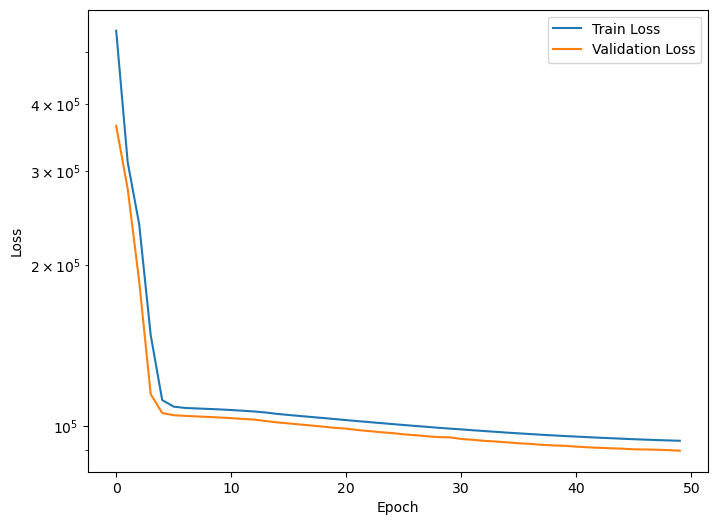

1534/1534 ━━━━━━━━━━━━━━━━━━━━ 1s 462us/step


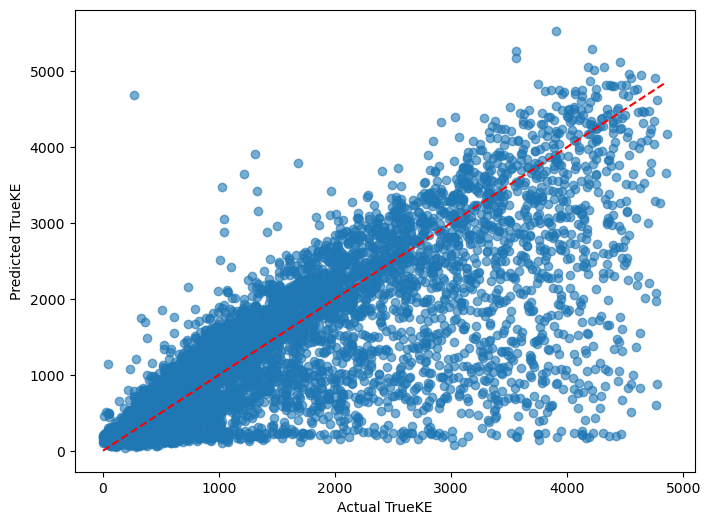

In [16]:
model = my_model()
history = model.fit(train_data, train_target, epochs=N_epochs, batch_size=batchSize, callbacks=callbacks_, verbose=1, validation_data=(test_data, test_target))

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

y_pred = model.predict(test_data)
plt.figure(figsize=(8, 6))
plt.scatter(test_target, y_pred, alpha=0.6)
plt.xlabel('Actual TrueKE')
plt.ylabel('Predicted TrueKE')
plt.plot([test_target.min(), test_target.max()], [test_target.min(), test_target.max()], 'r--')
plt.show()



In [21]:
from sklearn.ensemble import GradientBoostingRegressor
gbr0 = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr0.fit(train_data, train_target.to_numpy())
train_r2 = gbr0.score(train_data, train_target)
test_r2 = gbr0.score(test_data, test_target)
print("Training R²: %.3f" % train_r2)
print("Test R²:     %.3f" % test_r2)

Training R²: 0.783
Test R²:     0.782


The GBRT regressor achieved Training R² ≈ 0.783 and Test R² ≈ 0.782, which is slightly higher than the NN regressor’s average cross-validated R² of about 0.76 (± 0.01). This suggests that, for this dataset, the GBRT model is marginally outperforming the NN regressor and is generalizing very well (with minimal overfitting), though both models are performing quite competitively.

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best estimator:
GradientBoostingRegressor(learning_rate=0.05, max_depth=10, min_samples_leaf=50,
                          random_state=42)


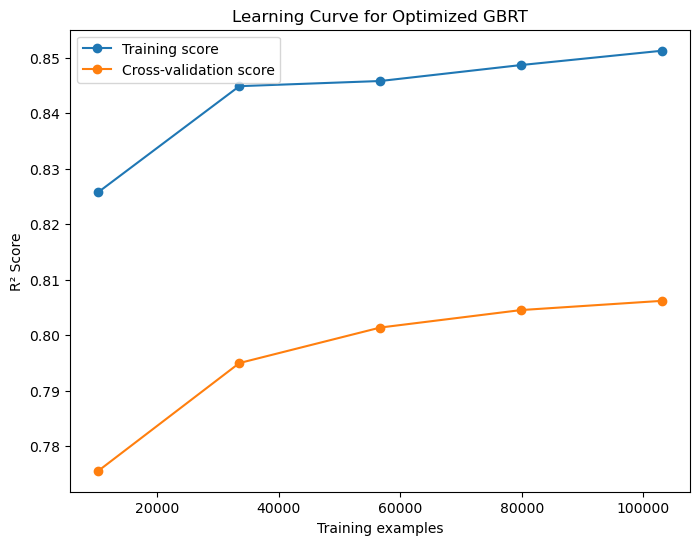

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid_ = {
    'n_estimators': [100],
    'learning_rate': [0.1, 0.05],
    'max_depth': [5, 10],
    'min_samples_leaf': [50, 100]
}
njobs_ = 8
np.random.seed(42)
gbr = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid_, cv=kfold, n_jobs=njobs_, verbose=1, scoring='r2')
grid_search.fit(train_data, train_target.to_numpy())
print("Best estimator:")
print(grid_search.best_estimator_)

from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(grid_search.best_estimator_, train_data, train_target, cv=kfold, scoring='r2', n_jobs=njobs_)
train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('R² Score')
plt.title('Learning Curve for Optimized GBRT')
plt.legend(loc='best')
plt.show()



Cross-validation R² on test data: 0.80 ± 0.02


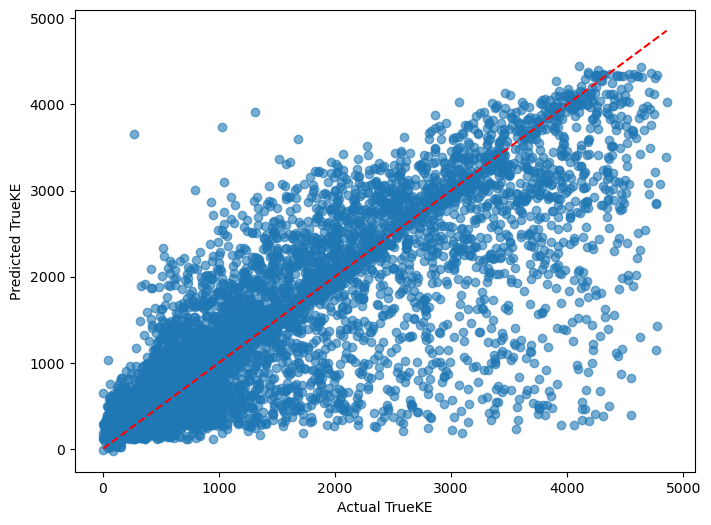

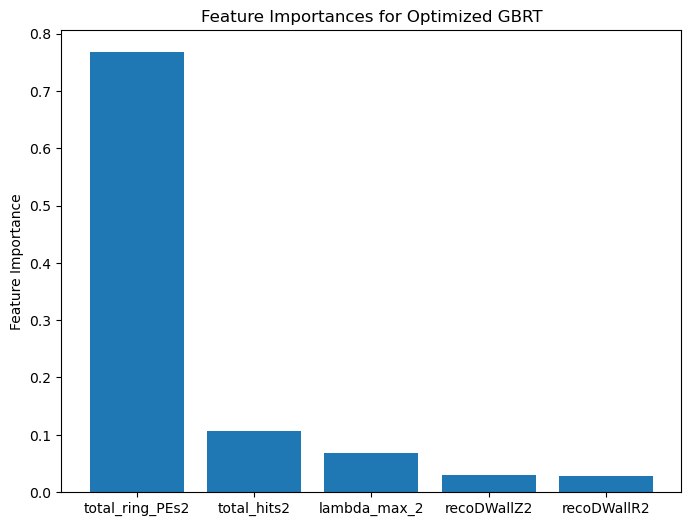

In [26]:
best_gbr = grid_search.best_estimator_
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_gbr, test_data, test_target, cv=kfold, scoring='r2')
print("Cross-validation R² on test data: %.2f ± %.2f" % (cv_scores.mean(), cv_scores.std()))

best_gbr.fit(train_data, train_target.to_numpy())
y_pred_gbr = best_gbr.predict(test_data)
plt.figure(figsize=(8, 6))
plt.scatter(test_target, y_pred_gbr, alpha=0.6)
plt.xlabel('Actual TrueKE')
plt.ylabel('Predicted TrueKE')
plt.plot([test_target.min(), test_target.max()], [test_target.min(), test_target.max()], 'r--')
plt.show()

import numpy as np
feature_importances = best_gbr.feature_importances_
features = test_data.columns
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(8, 6))
plt.bar(range(len(features)), feature_importances[indices], align='center')
plt.xticks(range(len(features)), features[indices])
plt.ylabel('Feature Importance')
plt.title('Feature Importances for Optimized GBRT')
plt.show()

